In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import integrate, interpolate, stats, special
from pathlib import Path
import pickle
import os
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.special
from tqdm import tqdm
import git 
import math
np.random.seed(42)

In [2]:
def gen_gamma_mean(r, eta):
    return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)

def gen_gamma_variance(r, eta):
    mean = gen_gamma_mean(r, eta)
    second_moment = scipy.special.gamma((eta+3.5)/r) / scipy.special.gamma((eta+1.5)/r)
    return second_moment - mean**2

def find_eta_for_target_mean(r, target_mean):
    def objective(eta):
        return (gen_gamma_mean(r, eta) - target_mean)**2
    result = scipy.optimize.minimize_scalar(objective, bounds=(0, 1e3))
    return result.x

def variance_prior(r, eta, scale=1):
    beta = (eta+1.5)/r
    var_prior = scale * scipy.special.gamma(beta + 1/r)/scipy.special.gamma(beta)
    return var_prior

def kurtosis_prior(r, eta, fisher=True):
    beta = (eta+1.5)/r
    kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2 
    if fisher:
        return kurtosis - 3
    else:
        return kurtosis

In [3]:
all_r_vals = []
all_eta_vals = []
target_vars = np.round(np.arange(2, 5, 0.25), 2)

for target_mean in target_vars:

    r_vals = []
    eta_vals = []
    mean_vals = []
    variance_vals = []

    for r in np.arange(0,10,0.1):
        
        eta = find_eta_for_target_mean(r, target_mean)
        mean = gen_gamma_mean(r, eta)
        variance = gen_gamma_variance(r, eta)
        if eta == np.inf or variance == np.nan or mean == np.nan or math.isnan(eta):
           break
        
        r_vals.append(r)
        eta_vals.append(eta)
        mean_vals.append(mean)
        variance_vals.append(variance)

    all_r_vals.append(np.array(r_vals))
    all_eta_vals.append(np.array(eta_vals))

all_r_vals[0].shape
all_eta_vals[0].shape

C:\Users\yashd\AppData\Local\Temp\ipykernel_29640\3592043928.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)
C:\Users\yashd\AppData\Local\Temp\ipykernel_29640\3592043928.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)
C:\Users\yashd\AppData\Local\Temp\ipykernel_29640\3592043928.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  second_moment = scipy.special.gamma((eta+3.5)/r) / scipy.special.gamma((eta+1.5)/r)
C:\Users\yashd\AppData\Local\Temp\ipykernel_29640\3592043928.py:6: RuntimeWarning: invalid value encountered in scalar divide
  second_moment = scipy.special.gamma((eta+3.5)/r) / scipy.special.gamma((eta+1.5)/r)


(100,)

C:\Users\yashd\AppData\Local\Temp\ipykernel_29640\3559139423.py:2: RuntimeWarning: divide by zero encountered in divide
  beta_vals = np.divide((eta_vals + 1.5), r_vals)
C:\Users\yashd\AppData\Local\Temp\ipykernel_29640\3559139423.py:2: RuntimeWarning: divide by zero encountered in divide
  beta_vals = np.divide((eta_vals + 1.5), r_vals)
C:\Users\yashd\AppData\Local\Temp\ipykernel_29640\3559139423.py:2: RuntimeWarning: divide by zero encountered in divide
  beta_vals = np.divide((eta_vals + 1.5), r_vals)
C:\Users\yashd\AppData\Local\Temp\ipykernel_29640\3559139423.py:2: RuntimeWarning: divide by zero encountered in divide
  beta_vals = np.divide((eta_vals + 1.5), r_vals)
C:\Users\yashd\AppData\Local\Temp\ipykernel_29640\3559139423.py:2: RuntimeWarning: divide by zero encountered in divide
  beta_vals = np.divide((eta_vals + 1.5), r_vals)
C:\Users\yashd\AppData\Local\Temp\ipykernel_29640\3559139423.py:2: RuntimeWarning: divide by zero encountered in divide
  beta_vals = np.divide((eta_v

Text(0, 0.5, '$\\beta$')

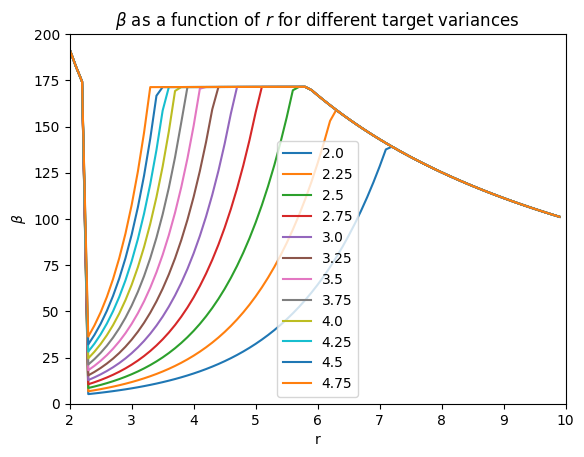

In [4]:
for i, (r_vals, eta_vals) in enumerate(zip(all_r_vals, all_eta_vals)):
    beta_vals = np.divide((eta_vals + 1.5), r_vals)
    sns.lineplot(x = r_vals, 
                 y = beta_vals,
                 label = f'{target_vars[i]}')
plt.ylim((0, 200))
plt.xlim((2, 10))
plt.title(f'$\\beta$ as a function of $r$ for different target variances')
plt.xlabel('r')
plt.ylabel(f'$\\beta$')


Text(0, 0.5, 'Log $\\beta$')

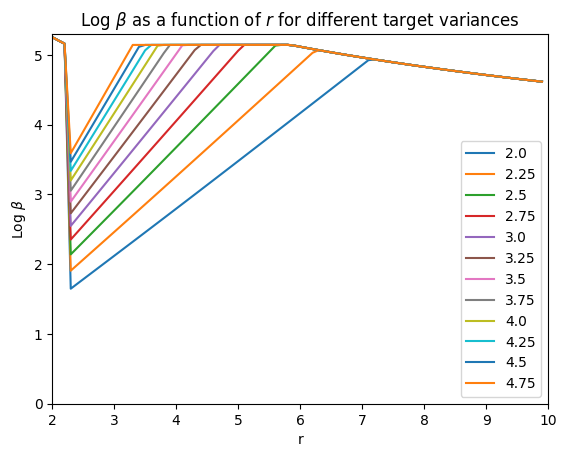

In [5]:
k = 2
for i, (r_vals, eta_vals) in enumerate(zip(all_r_vals, all_eta_vals)):

    beta_vals = np.divide((eta_vals[k:] + 1.5), r_vals[k:])
    sns.lineplot(x = r_vals[k:], 
                 y = np.log(beta_vals),
                 label = f'{target_vars[i]}'
                 )
plt.ylim((0, np.log(200)))
plt.xlim((2, 10))
plt.title(f'Log $\\beta$ as a function of $r$ for different target variances')
plt.xlabel('r')
plt.ylabel(f'Log $\\beta$')

Text(0, 0.5, 'Log $\\beta$')

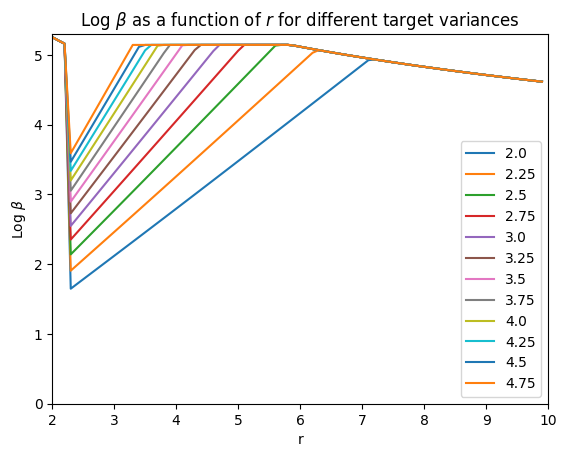

In [6]:
k = 2
for i, (r_vals, eta_vals) in enumerate(zip(all_r_vals, all_eta_vals)):

    beta_vals = np.divide((eta_vals[k:] + 1.5), r_vals[k:])
    sns.lineplot(x = r_vals[k:], 
                 y = np.log(beta_vals),
                 label = f'{target_vars[i]}'
                 )
plt.ylim((0, np.log(200)))
plt.xlim((2, 10))
plt.title(f'Log $\\beta$ as a function of $r$ for different target variances')
plt.xlabel('r')
plt.ylabel(f'Log $\\beta$')

## Requires MATLAB to generate prior PDF

In [7]:
r_vals, eta_vals = r15_values, eta15_values
target_mean = 1.5
for i in range(0, len(r_vals), len(r_vals)//8)[1:-3]:
    xs, pdf = compute_prior_pdf(r_vals[i], eta_vals[i], n_samples=1000)
    plt.plot(xs, pdf, label = f'r = {round_to_sigfigs(r_vals[i], 4)}, eta = {round_to_sigfigs(eta_vals[i], 4)}')
plt.plot(xs, stats.norm(scale=1.5).pdf(xs), label = f'Normal(0, 1.5)')

plt.legend(loc='lower left')
plt.imshow('images/gengamma_gaussian_analysis_var15.png', bbox_inches = 'tight')

NameError: name 'r15_values' is not defined

No Tail
No Tail
No Tail
No Tail


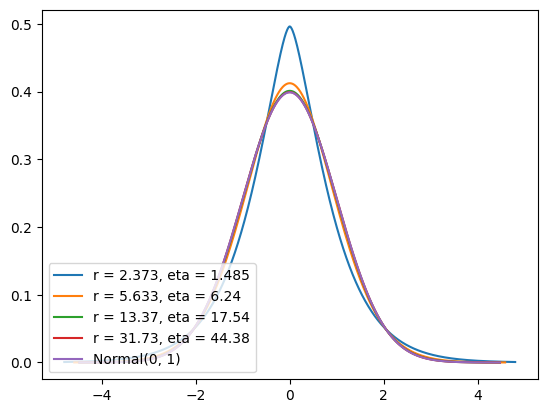

In [ ]:
r_vals, eta_vals = r1_values, eta1_values
target_mean = 1
for i in range(0, len(r_vals), len(r_vals)//8)[1:-3]:
    xs, pdf = compute_prior_pdf(r_vals[i], eta_vals[i], n_samples=1000)
    plt.plot(xs, pdf, label = f'r = {round_to_sigfigs(r_vals[i], 4)}, eta = {round_to_sigfigs(eta_vals[i], 4)}')
plt.plot(xs, stats.norm(scale=target_mean).pdf(xs), label = f'Normal(0, {target_mean})')

plt.legend(loc='lower left')
plt.savefig('images/gengamma_gaussian_analysis_var1.png', bbox_inches = 'tight')

In [ ]:
def sample_prior(r, eta, size=1):
    '''
    Samples from prior distribution of signal x
    r : shape parameter, must be nonzero
    eta : shape parameter, controls roundedness of peak, must be > 0
    size : integer specifying number of samples required
    Note that the model is paramterized such that the generalized gamma variables are the variances (not the standard deviation)
    '''
    vars = stats.gengamma.rvs(a = (eta + 1.5)/r, c = r, size = size)
    x = np.random.normal(scale = np.sqrt(vars), size=size)
    return x

100%|██████████| 115/115 [00:25<00:00,  4.50it/s]

2.4860178528052993e+78


<Axes: xlabel='r', ylabel='eta'>

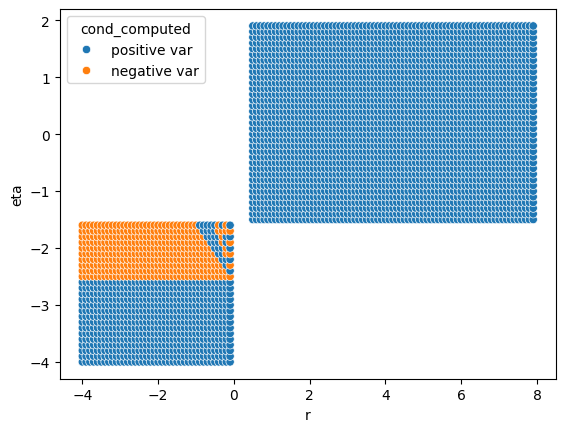

In [ ]:
np.seterr(divide = 'ignore')
np.seterr(invalid = 'ignore') 
cond1, cond2, cond3 = [], [], []

def get_prior_var(r, eta):
    beta = (eta + 1.5)/r
    return scipy.special.gamma(beta + 1/r) / scipy.special.gamma(beta)

r_vals = np.append(np.arange(-4, 0, 0.1), np.arange(0.5, 8, 0.1))
eta_vals = np.arange(-4, 2, 0.1) 

df = pd.DataFrame(columns = ['r', 'eta', 'beta', 'beta+1/r', 'empirical_mean', 'empirical_var', 'computed_var', '% error'])
c = 0
mu = []
var = []
for i in tqdm(range(len(r_vals))):
    for eta in eta_vals:
        r = r_vals[i]

        beta = (eta+1.5)/r
        
        if beta <= 0:
            cond1.append((r, eta))
            continue
        
        if beta + 1/r <= 0:
            cond2.append((r, eta))
            # continue

        if 0 < beta + 1/r <= 1:
            cond3.append((r, eta))
            # continue
        for _ in range(10):
            x = sample_prior(r, eta, 1000)
            mu.append(np.mean(x))
            var.append(np.var(x))

        computed_var = get_prior_var(r, eta)
        
        df.loc[len(df.index), ] = r, eta, (eta+1.5)/r, ((eta+1.5)/r + 1/r), np.mean(mu), np.mean(var), computed_var, np.abs(np.mean(var) - computed_var)/computed_var * 100

print(df['% error'].mean())

def mapping(x):
    if x < 0:
        return 'negative var'
    else:
        return 'positive var'

df['cond_computed'] = df['computed_var'].apply(mapping)
sns.scatterplot(data=df, x = 'r', y = 'eta', hue = 'cond_computed')

<Axes: xlabel='r', ylabel='eta'>

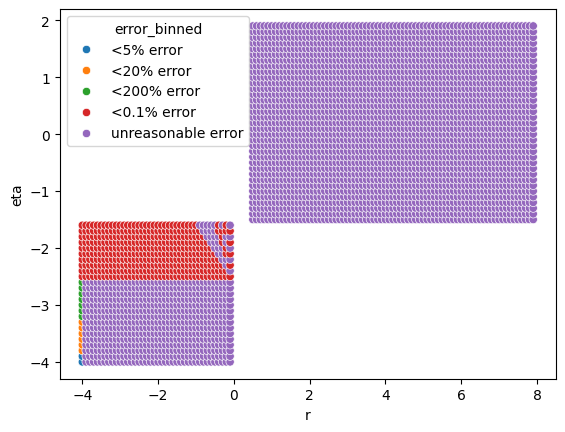

In [ ]:
def mapping(x):
    if x < 0.1:
        return '<0.1% error'
    elif x < 1:
        return '<1% error'
    elif x < 5:
        return '<5% error'
    elif x < 20:
        return '<20% error'
    elif x < 200:
        return '<200% error'
    elif x < 1000:
        return '<1000% error'
    else:
        return 'unreasonable error'


df['error_binned'] = df['% error'].apply(mapping)
sns.scatterplot(data=df, x = 'r', y = 'eta', hue = 'error_binned')

In [ ]:
df

,r,eta,beta,beta+1/r,empirical_mean,empirical_var,computed_var,% error,cond_computed,error_binned
0,-4.0,-4.0,0.625,0.375,-0.007133,1.618852,1.652426,2.031798,positive var,<5% error
1,-4.0,-3.9,0.6,0.35,-0.011507,1.648728,1.70975,3.569084,positive var,<5% error
2,-4.0,-3.8,0.575,0.325,-0.001846,1.685825,1.775291,5.039517,positive var,<20% error
3,-4.0,-3.7,0.55,0.3,0.002028,1.726368,1.851076,6.737071,positive var,<20% error
4,-4.0,-3.6,0.525,0.275,0.006611,1.767683,1.939868,8.876103,positive var,<20% error
...,...,...,...,...,...,...,...,...,...,...
3620,7.9,1.5,0.379747,0.506329,-6250607232333950856095334400.0,1413312142570475100120653363504756704685116584...,0.748221,1888896233864894991533467278535825851205067500...,positive var,unreasonable error
3621,7.9,1.6,0.392405,0.518987,-6248881498697194756137549824.0,1412921940432824362151543515574797767679365270...,0.755489,1870207681661438688470347592402483380239813069...,positive var,unreasonable error
3622,7.9,1.7,0.405063,0.531646,-6247156717714942647255171072.0,1412531953697954679420569994333996767594110239...,0.762474,1852564059491216553633137445315639463784142879...,positive var,unreasonable error
3623,7.9,1.8,0.417722,0.544304,-6245432888598575311984001024.0,1412142182187552438974196661078211953583531861...,0.769194,1835872227067592988308363882073344676006857210...,positive var,unreasonable error
